Abhimanyu Gajula
Sachin Gahane
Sneha Subramanian

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ma
import seaborn as sns
import plotly.express as px

In [34]:
from plotly import graph_objects as go


In [36]:
from google.colab import files
doc = files.upload()

Saving Unicorn_Companies.csv to Unicorn_Companies (1).csv


In [37]:
x = pd.read_csv('Unicorn_Companies.csv')

In [38]:
x.head(2)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None


In [39]:
x.Country.value_counts()

United States           537
China                   168
India                    63
United Kingdom           42
Germany                  24
France                   24
Israel                   20
Canada                   19
Brazil                   16
South Korea              12
Singapore                12
Indonesia                 7
Japan                     6
Netherlands               6
Mexico                    6
Hong Kong                 6
Australia                 6
Sweden                    6
Ireland                   5
Switzerland               5
Norway                    4
Spain                     3
Turkey                    3
Finland                   3
Belgium                   3
United Arab Emirates      3
Chile                     2
Philippines               2
Thailand                  2
Colombia                  2
Vietnam                   2
Austria                   2
Denmark                   2
Estonia                   2
South Africa              2
Croatia             

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   float64
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1024 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1037 non-null   object 
 7   Founded Year       1037 non-null   int64  
 8   Total Raised       1037 non-null   object 
 9   Financial Stage    1037 non-null   object 
 10  Investors Count    1037 non-null   object 
 11  Deal Terms         1037 non-null   object 
 12  Portfolio Exits    1037 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 105.4+ KB


In [41]:
x[['investor_1', 'investor_2', 'investor_3', 'investor_4']] = x['Select Inverstors'].str.split(', ', expand=True)
x.drop(columns = 'Select Inverstors', inplace=True)

In [42]:
x

,Company,Valuation ($B),Date Joined,Country,City,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,investor_1,investor_2,investor_3,investor_4
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,2012,$7.44B,IPO,28,8,5,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,2002,$6.874B,None,29,12,None,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,2010,$2.901B,Asset,39,12,1,Khosla Ventures,LowercaseCapital,capitalG,None
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,2005,$3.472B,Acquired,56,13,1,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,1991,$4.377B,Acquired,25,5,2,Tencent Holdings,KKR,Smash Ventures,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2/22/2022,United States,New York,Internet software & services,2015,$181.06M,None,7,2,None,New Enterprise Associates,Benchmark,Two Sigma Ventures,None
1033,Scalapay,1.0,2/23/2022,Italy,Milan,Fintech,2019,$700M,None,10,2,None,Fasanara Capital,Tiger Global Management,Baleen Capital,None
1034,Omada Health,1.0,2/23/2022,United States,San Francisco,Health,2011,$449.72M,None,30,6,None,U.S. Venture Partners,dRx Capital,Andreessen Horowitz,None
1035,BlueVoyant,1.0,2/23/2022,United States,New York,Cybersecurity,2017,$525.5M,None,6,2,None,8VC,Liberty Strategic Capital,Eden Global Partners,None


In [62]:
fig = px.treemap(x, path = ['Country', 'Industry'], values='Valuation ($B)')

fig.update_layout(title='<b>Overview of Unicorns by Country and Industry<b>',
                  titlefont={'size': 15},
                  
                  template='simple_white',
                  paper_bgcolor='#edeeee',
                  plot_bgcolor='#edeeee', 

                 )

fig.show()

In [63]:
count_indust=x['Industry'].value_counts()
industries_pie = go.Figure(data=[go.Pie(labels=count_indust.index, 
                                        values=count_indust,
                                        hole=.3,
                                       hoverinfo='label+value',
                                       marker_colors=pc.cyclical.Twilight)])
industries_pie.update_layout(title=dict(text='Market coverage of with different industries',
                                         font=dict(
                                             family="'Poppins', sans-serif",
                                            size=30,
                                            color="#C70039")))
industries_pie.show()

In [64]:
ind = x.groupby(['Industry']).sum().sort_values(by ='Valuation ($B)', ascending=False)
ind

,Valuation ($B),Founded Year,year
Industry,,,
Fintech,823.87,398712,426308
Internet software & services,558.13,374300,391943
E-commerce & direct-to-consumer,331.09,213392,224135
Artificial intelligence,311.69,142920,147427
Other,265.20,108620,113094
Health,182.52,134749,139379
"Supply chain, logistics, & delivery",175.76,112708,117159
Data management & analytics,135.84,82495,82826
Cybersecurity,122.70,96644,98998


In [65]:
fig = px.line(ind, x=ind.index, y="Valuation ($B)", title='Industry-wise Analysis')
fig.show()

In [66]:
x['year'] = pd.to_datetime(x['Date Joined']).dt.year
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1037 non-null   object 
 1   Valuation ($B)   1037 non-null   float64
 2   Date Joined      1037 non-null   object 
 3   Country          1037 non-null   object 
 4   City             1024 non-null   object 
 5   Industry         1037 non-null   object 
 6   Founded Year     1037 non-null   int64  
 7   Total Raised     1037 non-null   object 
 8   Financial Stage  1037 non-null   object 
 9   Investors Count  1037 non-null   object 
 10  Deal Terms       1037 non-null   object 
 11  Portfolio Exits  1037 non-null   object 
 12  investor_1       1037 non-null   object 
 13  investor_2       989 non-null    object 
 14  investor_3       900 non-null    object 
 15  investor_4       6 non-null      object 
 16  year             1037 non-null   int64  
dtypes: float64(1),

In [67]:
uni_us = x[(x['Country'] == 'United States') & (x['year'] < 2022)]
uni_china = x[(x['Country'] == 'China') & (x['year'] < 2022)]
uni_india = x[(x['Country'] == 'India') & (x['year'] < 2022)]

val_us = uni_us.groupby('year')['Valuation ($B)'].sum().reset_index()
val_china = uni_china.groupby('year')['Valuation ($B)'].sum().reset_index()
val_india = uni_india.groupby('year')['Valuation ($B)'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=val_us['year'], y=val_us['Valuation ($B)'],
                         mode='lines+markers', name='United States', line = dict(color = 'midnightblue')))
fig.add_trace(go.Scatter(x=val_china['year'], y=val_china['Valuation ($B)'],
                         mode='lines+markers', name='China', line = dict(color = 'sienna')))
fig.add_trace(go.Scatter(x=val_india['year'], y=val_india['Valuation ($B)'],
                         mode='lines+markers', name='India', line = dict(color = 'darkorange')))

fig.update_layout(title = 'Yealy valuation comparison for Top 3 countries',
    title_x = 0.5,
    title_y = 0.85,
    xaxis_title = 'year',
    yaxis_title = 'Valuation ($B)',
    xaxis = dict(
                 showline = True,
                 showgrid = False,
                 showticklabels = True,
                 linewidth = 2,
                 ticks = 'outside'),
    font=dict(
              family="sans-serif",
              size=8,
              color='black'),
    yaxis = dict(
                 showgrid = True,
                 showticklabels=True),
    plot_bgcolor='ghostwhite')  

In [68]:
top_10 = x.sort_values(by = 'Valuation ($B)', ascending=False).head(10)
fig = px.bar(top_10, x = "Company", y = "Valuation ($B)",
             color = "Industry", title = "Top 10 companies by Valuation in ( billions($))")
fig.show()

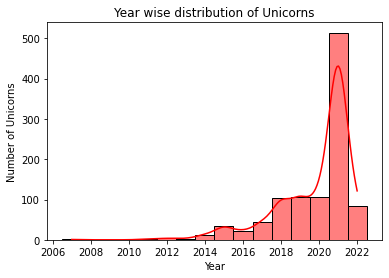

In [69]:
fig = sns.histplot(data = x, x = 'year', discrete =True, kde =True, color = 'red')
labels = fig.set(xlabel ="Year", ylabel = "Number of Unicorns", title ="Year wise distribution of Unicorns")


INVESTOR ANALYSIS

In [70]:
investor_df = x[['Company','Country','investor_1','investor_2','investor_3','investor_4']]
investor_df

,Company,Country,investor_1,investor_2,investor_3,investor_4
0,Bytedance,China,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,United States,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Stripe,United States,Khosla Ventures,LowercaseCapital,capitalG,None
3,Klarna,Sweden,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,Epic Games,United States,Tencent Holdings,KKR,Smash Ventures,None
...,...,...,...,...,...,...
1032,Timescale,United States,New Enterprise Associates,Benchmark,Two Sigma Ventures,None
1033,Scalapay,Italy,Fasanara Capital,Tiger Global Management,Baleen Capital,None
1034,Omada Health,United States,U.S. Venture Partners,dRx Capital,Andreessen Horowitz,None
1035,BlueVoyant,United States,8VC,Liberty Strategic Capital,Eden Global Partners,None


In [71]:
all_investors = pd.concat([x['investor_1'],x['investor_2'],x['investor_3'],x['investor_4']],axis = 0)
all_investors.dropna(inplace=True)
all_investors.value_counts().nlargest(10)

Accel                          58
Tiger Global Management        51
Sequoia Capital China          46
Andreessen Horowitz            45
Sequoia Capital                44
Insight Partners               41
SoftBank Group                 33
Lightspeed Venture Partners    32
General Catalyst               32
Index Ventures                 30
dtype: int64

In [72]:
ind.reset_index()

,Industry,Valuation ($B),Founded Year,year
0,Fintech,823.87,398712,426308
1,Internet software & services,558.13,374300,391943
2,E-commerce & direct-to-consumer,331.09,213392,224135
3,Artificial intelligence,311.69,142920,147427
4,Other,265.20,108620,113094
5,Health,182.52,134749,139379
6,"Supply chain, logistics, & delivery",175.76,112708,117159
7,Data management & analytics,135.84,82495,82826
8,Cybersecurity,122.70,96644,98998
9,Hardware,101.15,64415,66618


In [73]:
df_us=x[x['Country']=='United States']
df_china=x[x['Country']=='China']
df_india=x[x['Country']=='India']

In [74]:
fig = px.scatter(df_china, x='year', y='Valuation ($B)', facet_col='City',
             facet_col_wrap=6, title='China Cities',labels={'year':'Year','Valuation ($B)':'Val($B)'})
fig.update_yaxes(matches=None)
fig

In [75]:
fig = px.scatter(df_india, x='year', y='Valuation ($B)', facet_col='City',
             facet_col_wrap=6, title='India Cities',labels={'year':'Year','Valuation ($B)':'Val($B)'})
fig.update_yaxes(matches=None)
fig

In [76]:
import plotly.colors as pc
from plotly.subplots import make_subplots

In [77]:
cityvalues = x[x['Country'] == 'United States']['City'].value_counts()[:10].to_frame()
cityvalues = cityvalues.join(x[x['Country'] == 'United States'].groupby('City').mean()['Valuation ($B)'],how='left')
fig = px.bar(cityvalues ,x=cityvalues.index,y='City',
             title='Number of Business City wise - USA',color = 'Valuation ($B)', color_continuous_scale='tealgrn')
fig.update_xaxes(title='City')
fig.update_yaxes(title='Number of Businesses')
fig.show()

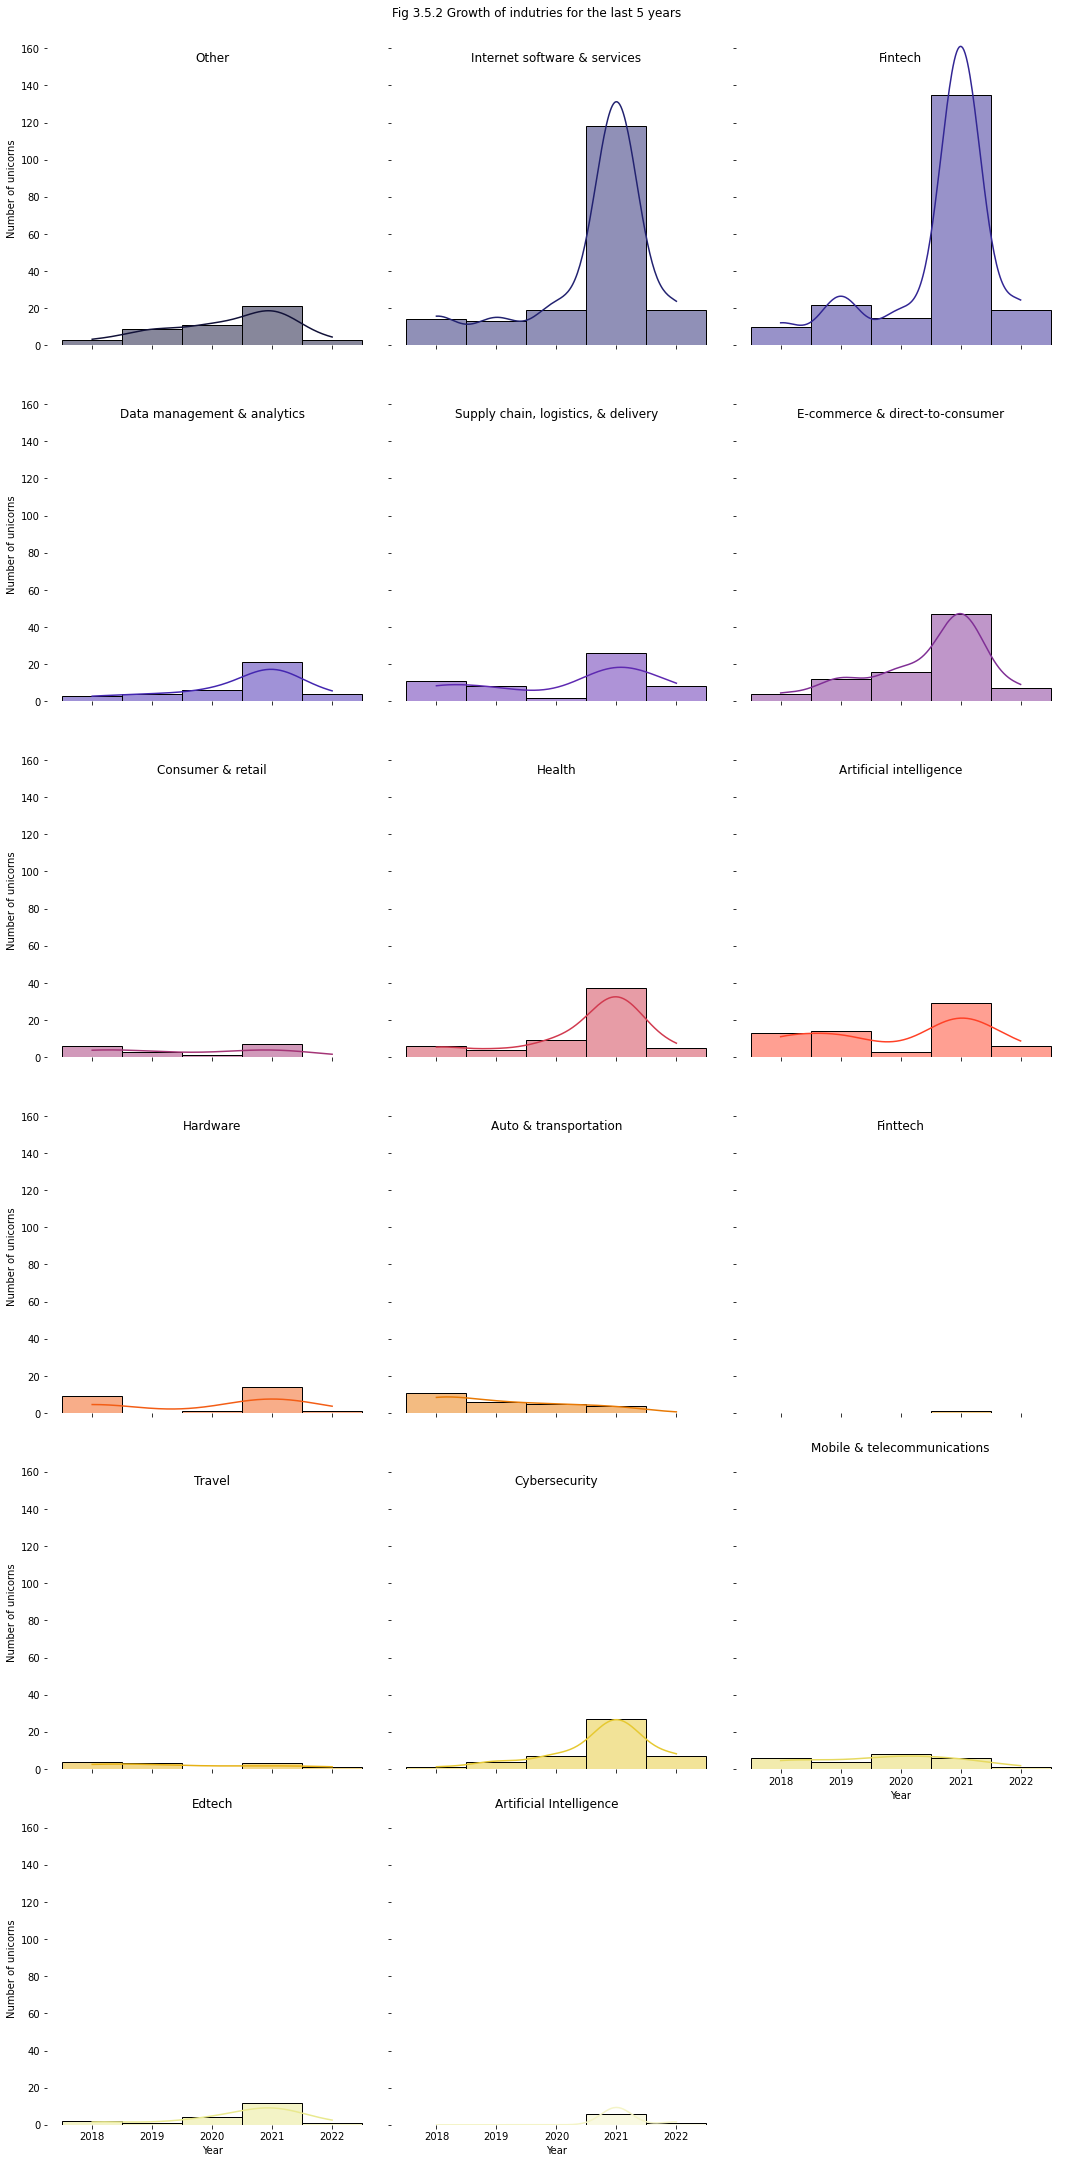

In [78]:
unicorns_2017 = x[x['year'] > 2017]
fig = sns.displot(data = unicorns_2017, x = 'year', hue = 'Industry', kde=True,
                  discrete = True, palette = 'CMRmap', legend = False, height=5, 
                  col = 'Industry',col_wrap = 3)
labels = fig.set(xlabel ="Year", ylabel = "Number of unicorns")
fig.fig.suptitle('Growth of indutries in the last 5 years', y = 1)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=True)
fig.set_titles(size=12, pad=-30, row_template = '{row_name}', col_template = '{col_name}')